**Import Libraries**

In [18]:
import os
import pickle
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences
from PIL import Image
import matplotlib.pyplot as plt


**Directories**

In [19]:
BASE_DIR = r'C:\Users\victus\Downloads\archive'
WORKING_DIR = r'C:\Users\victus\OneDrive\Desktop\AI'


**Load Model, Tokenizer, and Features**

In [20]:
# Load trained model
model = load_model(os.path.join(WORKING_DIR, 'best_model.keras'))

# Load tokenizer
with open(os.path.join(WORKING_DIR, 'tokenizer.pkl'), 'rb') as f:
    tokenizer = pickle.load(f)

# Load extracted features
with open(os.path.join(WORKING_DIR, 'features.pkl'), 'rb') as f:
    features = pickle.load(f)

# Hard-code the maximum caption length used during training
max_length = 37  # This must match the value used during training
print(f"Maximum caption length: {max_length}")


Maximum caption length: 37


**Helper Functions**

In [23]:
# ------------------- Helper Functions -------------------
def idx_to_word(integer, tokenizer):
    """Convert an integer index back to a word."""
    for word, index in tokenizer.word_index.items():
        if index == integer:
            return word
    return None

def predict_caption(model, image, tokenizer, max_length):
    """Generate caption for a given image using the trained model."""
    in_text = 'startseq'
    for _ in range(max_length):
        # Encode input sequence
        sequence = tokenizer.texts_to_sequences([in_text])[0]
        sequence = pad_sequences([sequence], max_length)
        
        # Predict the next word
        yhat = model.predict([image, sequence], verbose=0)
        yhat = np.argmax(yhat)
        word = idx_to_word(yhat, tokenizer)
        
        # Stop if word is None or 'endseq' is reached
        if word is None or word == 'endseq':
            break
        
        # Append the word to input text
        in_text += ' ' + word
    
    # Remove 'startseq' from the final output
    final_caption = in_text.replace('startseq ', '').strip()
    
    return final_caption

def generate_caption(image_name):
    """Load an image, display it, and generate its caption."""
    # Load the image and extract its ID
    image_id = image_name.split('.')[0]
    img_path = os.path.join(BASE_DIR, "Images", image_name)
    
    # Display the image
    image = Image.open(img_path)
    plt.imshow(image)
    plt.axis('off')  # Hide axes
    plt.show()
    
    # Generate predicted caption
    feature = features[image_id]  # Extract feature for the image
    y_pred = predict_caption(model, feature, tokenizer, max_length)
    
    print('--------------------Predicted--------------------')
    print(y_pred)

**Test Example**

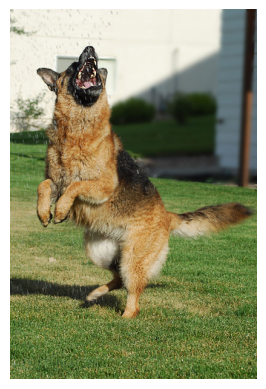

--------------------Predicted--------------------
brown dog is running through the grass


In [24]:
# Example image for caption generation
generate_caption("888517718_3d5b4b7b43.jpg")
